In [1]:
!pip install gdown
# https://docs.google.com/spreadsheets/d/1_2wXl44XJBV6D4Agz_oHykG073TuUfAH/edit?usp=sharing&ouid=106192783318345404239&rtpof=true&sd=true
!gdown https://drive.google.com/uc?id=1_2wXl44XJBV6D4Agz_oHykG073TuUfAH
#https://docs.google.com/spreadsheets/d/1eJwo5GHHeZ-fDQVniwL1GpARP5H_U-l2/edit?usp=sharing&ouid=106192783318345404239&rtpof=true&sd=true
!gdown https://drive.google.com/uc?id=1eJwo5GHHeZ-fDQVniwL1GpARP5H_U-l2

Downloading...
From: https://drive.google.com/uc?id=1_2wXl44XJBV6D4Agz_oHykG073TuUfAH
To: /content/Retail_Online_30-RFMPa_s.xlsx
100% 8.04k/8.04k [00:00<00:00, 16.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eJwo5GHHeZ-fDQVniwL1GpARP5H_U-l2
To: /content/Retail_Online_30.xlsx
100% 9.64M/9.64M [00:00<00:00, 30.0MB/s]


In [2]:
import pandas as pd
import numpy as np



path = "/content/Retail_Online_30-RFMC_digo.xlsx"

data = pd.read_excel(path)

# agregamos los quintiles
cond_i = 0
q = 1
DATA = None
for cond_f in [199, 287, 377, 511, np.inf]:
    cond_down = data["Puntuación_RFM"] >= cond_i
    cond_up = data["Puntuación_RFM"] < cond_f
    aux_data = data[cond_down & cond_up]
    aux_data["quintile"] = q
    if DATA is None:
        DATA = aux_data
    else:
        DATA = pd.concat([DATA, aux_data])
    cond_i = cond_f
    q += 1
data = DATA
data = data.sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [3]:
path = "/content/Retail_Online_30.xlsx"

data_p = pd.read_excel(path)

data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161708 entries, 0 to 161707
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      158935 non-null  float64       
 1   StockCode    145454 non-null  float64       
 2   Description  161247 non-null  object        
 3   Quantity     161708 non-null  int64         
 4   InvoiceDate  161708 non-null  datetime64[ns]
 5   Price        161708 non-null  float64       
 6   PostalCode   121340 non-null  float64       
 7   Country      161708 non-null  object        
 8   Monto_total  161708 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 11.1+ MB


In [4]:
data_p.head(n=1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,PostalCode,Country,Monto_total
0,536365.0,NaN,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [5]:
data.head(n=1)

,PostalCode,Fecha_más_reciente,Recuento_transacciones,Cantidad,Puntuación_actualidad,Puntuación_frecuencia,Puntuación_monetaria,Puntuación_RFM,quintile
0,NaN,2011-12-09 10:26:00,40368,433402.81,5,5,5,555,5


In [6]:
#NOTA: grafico para el EDA 
data_p.Country.value_counts()

United Kingdom          147781
Germany                   2755
France                    2581
EIRE                      2516
Spain                      809
Netherlands                693
Belgium                    612
Switzerland                595
Portugal                   448
Australia                  408
Norway                     333
Italy                      231
Channel Islands            227
Finland                    214
Cyprus                     190
Sweden                     126
Unspecified                124
Denmark                    118
Austria                    115
Japan                      108
Hong Kong                   97
USA                         92
Israel                      90
Poland                      88
Singapore                   68
Canada                      54
Greece                      42
Iceland                     42
Malta                       35
United Arab Emirates        24
Lebanon                     19
European Community          15
RSA     

In [7]:
data_p.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Finland', 'Austria',
       'Sweden', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
def postal2contry(postal):
    int_data = data_p[data_p["PostalCode"] == postal]
    lista =  list(set(int_data.Country.values))
    if len(lista) == 0:
        return None
    else:
        return lista.pop()
data = data.iloc[1:]
data["Country"] = data.PostalCode.apply(postal2contry)
data["Country"] = data["Country"].astype('category')
data["Country_codes"] = data["Country"].cat.codes

In [9]:
data.Country.value_counts()

United Kingdom          3801
Germany                   95
France                    87
Spain                     28
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   10
Norway                    10
Channel Islands            9
Netherlands                9
Sweden                     8
Japan                      7
Denmark                    7
Australia                  7
Cyprus                     6
Poland                     5
Unspecified                4
Greece                     4
USA                        4
Canada                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Malta                      2
Bahrain                    2
Singapore                  1
Brazil                     1
Lebanon                    1
Czech Republic             1
Lithuania                  1
European Community         1
RSA           

In [10]:
data.to_csv("data_rfm_processed.csv")

In [11]:
from sklearn.model_selection import train_test_split

test_size = 0.2
x_cols = ["PostalCode",
          "Recuento_transacciones", 
          "Cantidad",
          "Country_codes"]

x = data[x_cols].values
y = (data["quintile"] - 1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [12]:
import xgboost as xgb

data_train = xgb.DMatrix(x_train, y_train)
data_test = xgb.DMatrix(x_test, y_test)

parametros = {"booster":"gbtree",
              "max_depth": 4,
              "eta": .3, # LEARNING RATE
              "objective": "multi:softmax",  # xgboost de multi label clasificacion
              "nthread":8,
              "num_class": len(data["quintile"].unique())}

rounds = 1000  # epochs

evaluacion = [(data_test, "eval"), (data_train, "train")]

xgboost = xgb.train(parametros, data_test, rounds, evaluacion,
                    # early_stopping_rounds=20,
                   )

[0]	eval-merror:0.560427	train-merror:0.69078
[1]	eval-merror:0.53436	train-merror:0.682478
[2]	eval-merror:0.541469	train-merror:0.680403
[3]	eval-merror:0.528436	train-merror:0.672398
[4]	eval-merror:0.522512	train-merror:0.673881
[5]	eval-merror:0.522512	train-merror:0.677438
[6]	eval-merror:0.520142	train-merror:0.672695
[7]	eval-merror:0.503555	train-merror:0.67566
[8]	eval-merror:0.498815	train-merror:0.675067
[9]	eval-merror:0.476303	train-merror:0.675956
[10]	eval-merror:0.452607	train-merror:0.67981
[11]	eval-merror:0.444313	train-merror:0.680403
[12]	eval-merror:0.433649	train-merror:0.687519
[13]	eval-merror:0.421801	train-merror:0.685443
[14]	eval-merror:0.412322	train-merror:0.685443
[15]	eval-merror:0.406398	train-merror:0.686926
[16]	eval-merror:0.401659	train-merror:0.686333
[17]	eval-merror:0.385071	train-merror:0.686926
[18]	eval-merror:0.370853	train-merror:0.69078
[19]	eval-merror:0.36019	train-merror:0.68989
[20]	eval-merror:0.353081	train-merror:0.68989
[21]	eval-

La precision del modelo es: 100.0%
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       163
           4       1.00      1.00      1.00       174

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



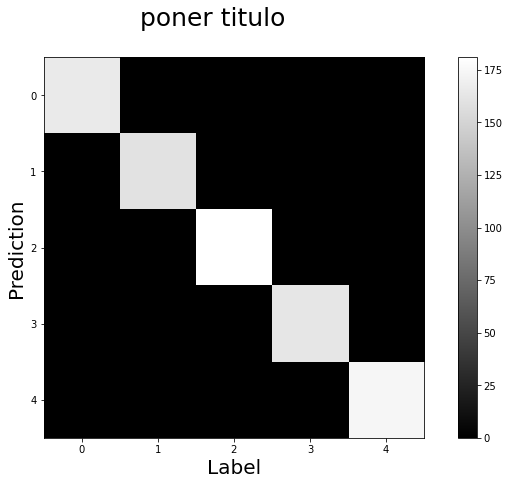

In [13]:
def evaluar_predicciones(y_true, y_pred):
    '''Esta funcion evalua las predicciones segun:
            * matriz de confusion
            * Escore de precision
    
    Parameters:
    ==========
    
        None
        
    returns:
    ========
    
        None
    '''
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    
    string = "La precision del modelo es: {}%".format(100*accuracy_score(y_true, y_pred))
    mtf = confusion_matrix(y_true, y_pred)
    print(string, end='\n \n')
    print(classification_report(y_true, y_pred))
    return mtf

def matrix_plot(matrix, name='name', title='titulo de la figura'):
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(12, 7))
    ax =  fig.add_subplot()
    img = ax.imshow(matrix, cmap='gray')
    fig.colorbar(img, ax=ax)
    ax.set_xlabel('Label', fontsize=20)
    ax.set_ylabel('Prediction', fontsize=20)
    fig.suptitle(title, fontsize=25)
    plt.savefig("{}.png".format(name), dpi=150)
    plt.show()

matrix = evaluar_predicciones(y_test, xgboost.predict(data_test))

matrix_plot(matrix, name='xgboost_confusion_matrix', title='poner titulo')

La precision del modelo es: 29.265402843601894%
 
              precision    recall  f1-score   support

           0       0.36      0.45      0.40       166
           1       0.21      0.21      0.21       160
           2       0.24      0.20      0.22       181
           3       0.26      0.25      0.26       163
           4       0.37      0.35      0.36       174

    accuracy                           0.29       844
   macro avg       0.29      0.29      0.29       844
weighted avg       0.29      0.29      0.29       844



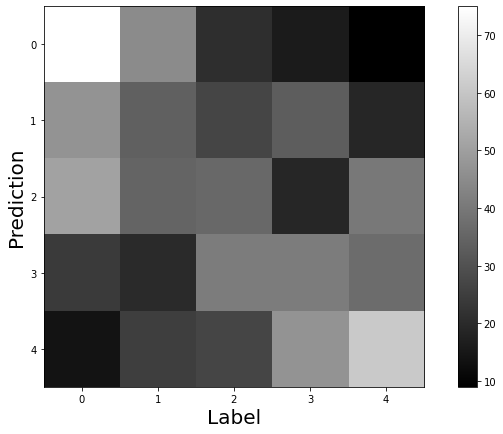

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(max_depth=20)
clf_random_forest.fit(x_train, y_train)

y_pred = clf_random_forest.predict(x_test)

matrix = evaluar_predicciones(y_test, y_pred)

matrix_plot(matrix, name='random_forest_confusion_matrix', title='')

La precision del modelo es: 29.02843601895735%
 
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       166
           1       0.19      0.21      0.20       160
           2       0.29      0.25      0.27       181
           3       0.29      0.27      0.28       163
           4       0.37      0.35      0.36       174

    accuracy                           0.29       844
   macro avg       0.29      0.29      0.29       844
weighted avg       0.29      0.29      0.29       844



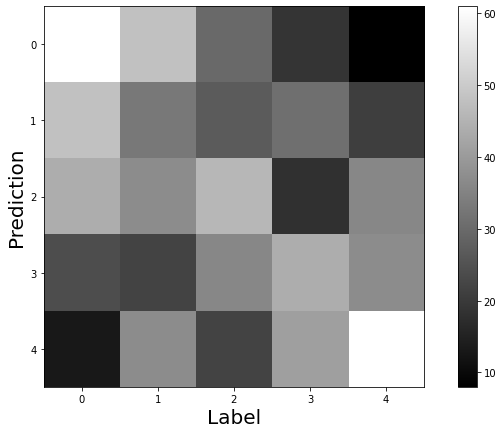

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=20, random_state=0)
clf_GB.fit(x_train, y_train)

y_pred = clf_GB.predict(x_test)

matrix = evaluar_predicciones(y_test, y_pred)

matrix_plot(matrix, name='random_forest_confusion_matrix', title='')